# Visualization shtuff

### Load CSV using pandas
- pandas = used to read csv file
- numpy = used for calculations / turning stuff into arrays
- matplotilb = used to create dashboard plots

In [1]:
# Import stuff lol
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read csv using pandas
df = pd.read_csv("./data/Warehouse_and_Retail_Sales.csv")

## Convert columns to NumPy arrays

In [2]:
# gets rid of values that removes bad data also cleans a tiny bit and makes trends visible lol...
# removes 0's and negatives
df = df[(df["WAREHOUSE SALES"] > 0) & (df["RETAIL SALES"] > 0)]
# filters extreme outliers that distorted plots by having very large sales
df = df[(df["WAREHOUSE SALES"] < 10000) & (df["RETAIL SALES"] < 5000)]
# filter rows by year & month, adding columns to get monthly total
monthly = df.groupby(["YEAR", "MONTH"]).sum()

# ".values" converts pandas column into a NumPy array
# built real date column from year and month ex: 2017 + 4 -> "2017-04"
dates = pd.to_datetime(monthly.index.get_level_values(0).astype(str)+"-"+monthly.index.get_level_values(1).astype(str)+"-01")

warehouse_sales = monthly["WAREHOUSE SALES"].values # is numpy array of numbers
retail_sales = monthly["RETAIL SALES"].values # same as ^

## Create a 2x2 subplot grid
- First I'll make simple 2x2 dashboard then go into finer detail below

Text(0.5, 0.98, 'Warehouse and Retail Sales Dashboard')

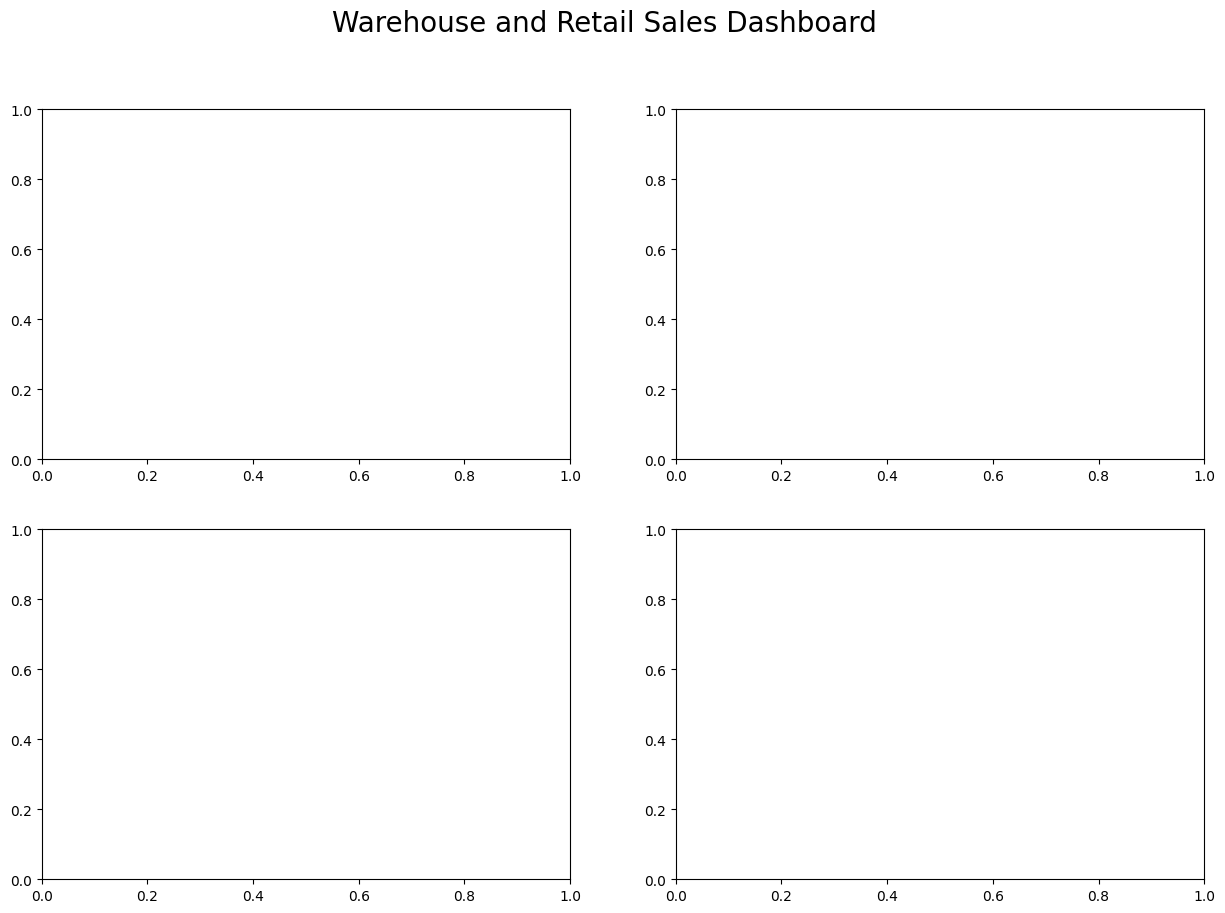

In [3]:
# creates figure with 4 plots on a 2x2 grid
# blueprint for axes becoming a 2d array like axes[0,0], axes[0,1], axes[1,0], axes[1,1]
fig, axes = plt.subplots(2,2,figsize=(15,10))
# biiig title for entire dashboard
fig.suptitle("Warehouse and Retail Sales Dashboard", fontsize=20)

## Plot 1 : Warehouse Sales Over Time

In [4]:
# drawing line chart of date vs warehouse sales
axes[0,0].plot(dates, warehouse_sales)
# giving plot 1 title
axes[0,0].set_title("Warehouse Sales Over Time")
# labeling x and y axes
axes[0,0].set_xlabel("Date")
axes[0,0].set_ylabel("Sales")

Text(4.444444444444452, 0.5, 'Sales')

## Plot 2 : Retail Sales Over Time 

In [5]:
# drawing a red line of date vs sales
axes[0,1].plot(dates,retail_sales,color="red")
# giving plot 2 title
axes[0,1].set_title("Retail Sales Over Time")
# labeling x and y axes
axes[0,1].set_xlabel("Date")
axes[0,1].set_ylabel("Sales")

Text(638.5353535353535, 0.5, 'Sales')

## Plot 3 : Average Sales Comparison
- NumPy Calculation :D

In [6]:
# calculate averages using numpy fast & efficiently >:)
avg_warehouse = np.mean(warehouse_sales)
avg_retail = np.mean(retail_sales)
# creates bar chart comparing averages which shows warehouse avg and retail avg
axes[1,0].bar(["Warehouse Avg", "Retail Avg"], [avg_warehouse, avg_retail], color=["blue","red"])
# labeling axes and title
axes[1,0].set_title("Average Sales Comparison")
axes[1,0].set_ylabel("Average Sales")

Text(4.444444444444452, 0.5, 'Average Sales')

## Plot 4 : Warehouse Sales Distribution

In [7]:
# Shows how many MONTHS warehouse sales had within a certain dollar range (how many months had sales in that range)
# some months didnt have sales in the range with the empty bins
# also the reason why the frequency isnt higher is because I filtered/removed negative values, zero values, crazy outliers = a lot of rows
# i also grouped the months so essentially i had 9 months of real data after filtering lol
# holy yap

# made histogram and bin size 20 to see in depth a bit more on how much was spent
axes[1,1].hist(warehouse_sales, bins=20, edgecolor="black")
# title and axes...
axes[1,1].set_title("Warehouse Sales Distribution")
axes[1,1].set_xlabel("Sales")
axes[1,1].set_ylabel("Frequency")

Text(638.5353535353535, 0.5, 'Frequency')

## SHOW ME DA MONEY

In [8]:
# clean up layout and let there be light...
plt.tight_layout(rect=[0,0,1,1])
plt.show()

<Figure size 640x480 with 0 Axes>

- uhhh heres the actual demo lol

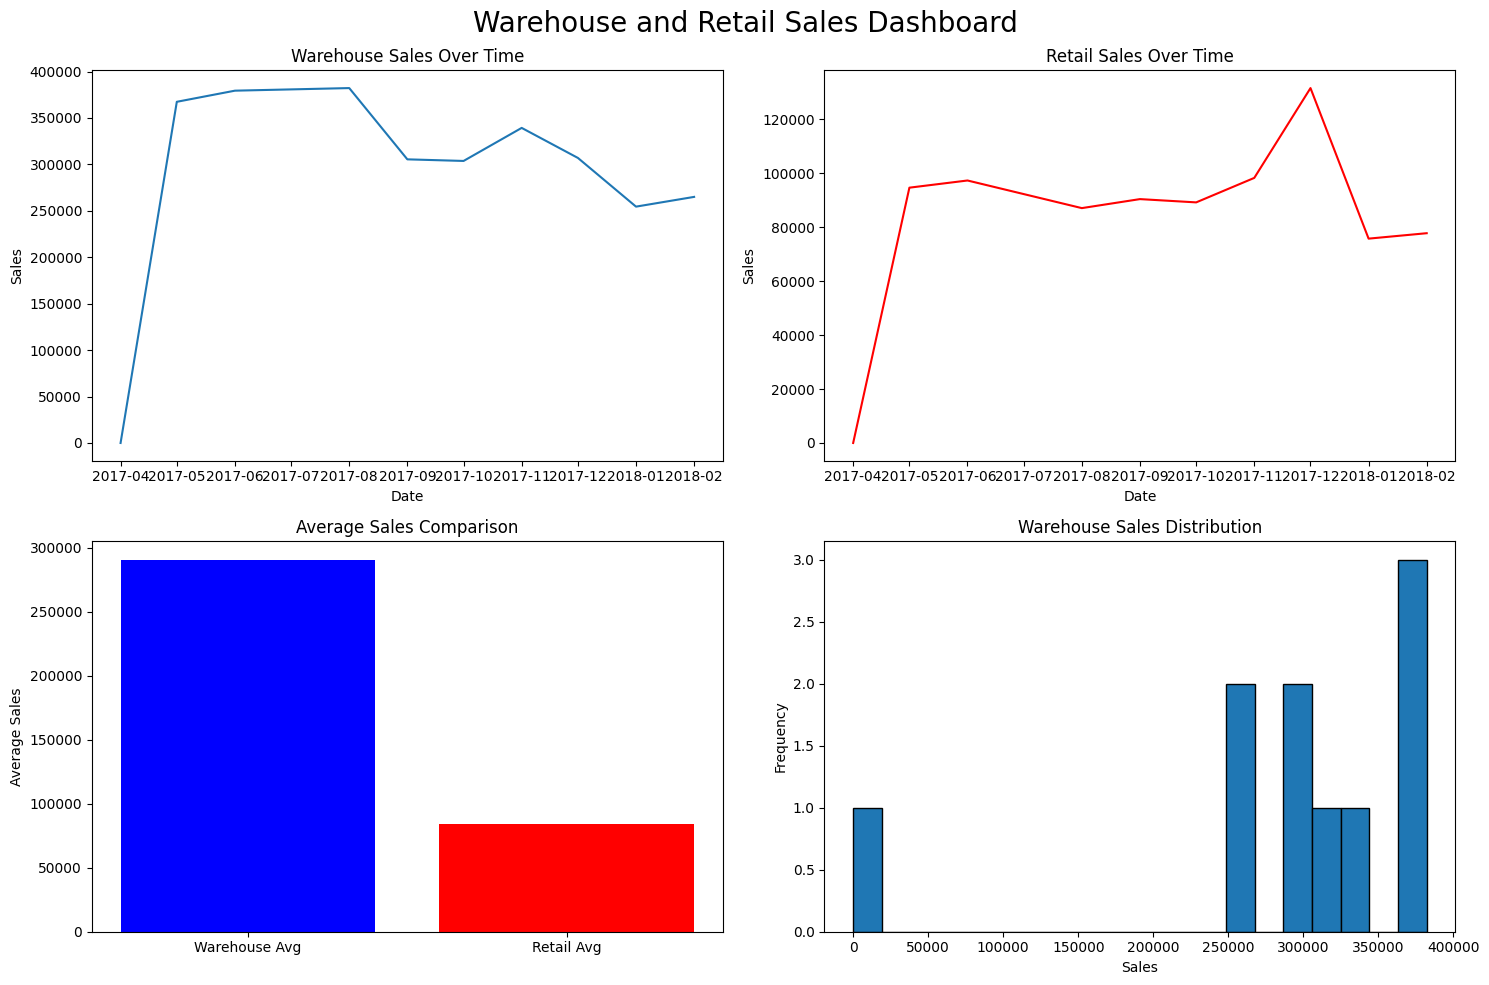

In [12]:
# Import stuff lol
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read csv using pandas
df = pd.read_csv("./data/Warehouse_and_Retail_Sales.csv")

#-------------------------------------------------------------

# gets rid of values that removes bad data also cleans a tiny bit and makes trends visible lol...
# # removes 0's and negatives
# df = df[(df["WAREHOUSE SALES"] > 0) & (df["RETAIL SALES"] > 0)]
# # filters extreme outliers that distorted plots by having very large sales
# df = df[(df["WAREHOUSE SALES"] < 10000) & (df["RETAIL SALES"] < 5000)]
# # filter rows by year & month, adding columns to get monthly total
# monthly = df.groupby(["YEAR", "MONTH"]).sum()

# ".values" converts pandas column into a NumPy array
# built real date column from year and month ex: 2017 + 4 -> "2017-04"
dates = pd.to_datetime(monthly.index.get_level_values(0).astype(str)+"-"+monthly.index.get_level_values(1).astype(str)+"-01")

warehouse_sales = monthly["WAREHOUSE SALES"].values # is numpy array of numbers
retail_sales = monthly["RETAIL SALES"].values # same as ^

#------------------------------------------------------------

# creates figure with 4 plots on a 2x2 grid
# blueprint for axes becoming a 2d array like axes[0,0], axes[0,1], axes[1,0], axes[1,1]
fig, axes = plt.subplots(2,2,figsize=(15,10))
# biiig title for entire dashboard
fig.suptitle("Warehouse and Retail Sales Dashboard", fontsize=20)

#------------------------------------------------------------

# warehouse sales over time

# drawing line chart of date vs warehouse sales
axes[0,0].plot(dates, warehouse_sales)
# giving plot 1 title
axes[0,0].set_title("Warehouse Sales Over Time")
# labeling x and y axes
axes[0,0].set_xlabel("Date")
axes[0,0].set_ylabel("Sales")

#------------------------------------------------------------

# retail sales over time

# drawing a red line of date vs sales
axes[0,1].plot(dates,retail_sales,color="red")
# giving plot 2 title
axes[0,1].set_title("Retail Sales Over Time")
# labeling x and y axes
axes[0,1].set_xlabel("Date")
axes[0,1].set_ylabel("Sales")

#------------------------------------------------------------

# around 40~% of retail sales are in warehouse sales
# shows avg sales comparison

# calculate averages using numpy fast & efficiently >:)
avg_warehouse = np.mean(warehouse_sales)
avg_retail = np.mean(retail_sales)
# creates bar chart comparing averages which shows warehouse avg and retail avg
axes[1,0].bar(["Warehouse Avg", "Retail Avg"], [avg_warehouse, avg_retail], color=["blue","red"])
# labeling axes and title
axes[1,0].set_title("Average Sales Comparison")
axes[1,0].set_ylabel("Average Sales")

#------------------------------------------------------------

# Shows how many MONTHS warehouse sales had within a certain dollar range (how many months had sales in that range)
# some months didnt have sales in the range with the empty bins
# also the reason why the frequency isnt higher is because I filtered/removed negative values, zero values, crazy outliers = a lot of rows
# i also grouped the months so essentially i had 9 months of real data after filtering lol
# holy yap

# made histogram and bin size 20 to see in depth a bit more on how much was spent
axes[1,1].hist(warehouse_sales, bins=20, edgecolor="black")
# title and axes...
axes[1,1].set_title("Warehouse Sales Distribution")
axes[1,1].set_xlabel("Sales")
axes[1,1].set_ylabel("Frequency")

#------------------------------------------------------------

# clean up layout and let there be light...
plt.tight_layout(rect=[0,0,1,1])
plt.show()